# Convolución como producto matricial

In [1]:
!git clone https://github.com/rollervan/FunMat.git temp
!cp -r ./temp/Codes/Images ./
!rm -rf ./temp

Cloning into 'temp'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 192 (delta 63), reused 173 (delta 46), pack-reused 0
Receiving objects: 100% (192/192), 18.17 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
from scipy.linalg import toeplitz


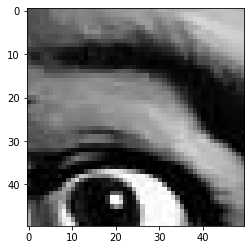

In [3]:
path_to_image = './Images/dali-bw.jpg'
im = Image.open(path_to_image)
im = np.asarray(im)

im = im[100:150, 100:150]

h, w = im.shape
plt.imshow(im, cmap='gray')
plt.show()

In [4]:
kernel = np.array([[0.01, 1., 0.01],
                   [1., -4., 1.],
                   [0.01, 1., 0.01]])
kh, kw = kernel.shape

In [5]:
out_conv = convolve2d(kernel, im)
out_conv = np.clip(out_conv, 0, 255)
display(out_conv.shape)
display((h+kh-1, w+kw-1))

(52, 52)

(52, 52)

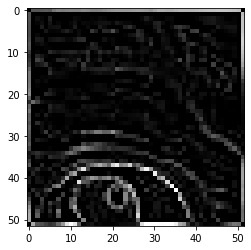

In [6]:
plt.imshow(out_conv, cmap='gray')
plt.show()

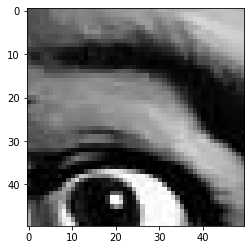

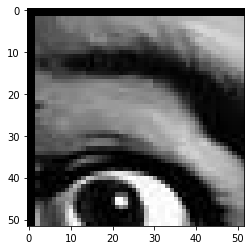

In [7]:
# Padding de la imagen
im_pad = np.pad(im, ((kw-1,0),(kh-1,0)), mode='constant', constant_values=(0, 0))
plt.imshow(im, cmap='gray')
plt.show()
plt.imshow(im_pad, cmap='gray')
plt.show()

# Vectorizamos la imagen
im_v = np.reshape(im_pad, (-1,1))

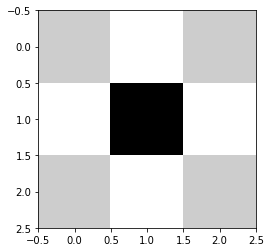

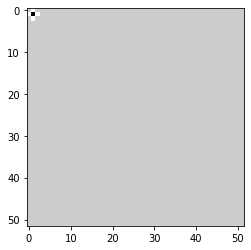

In [8]:
# Padding del kernel
k_pad = np.pad(kernel, ((0, h + kh - kh - 1), (0, w - 1)), mode='constant', constant_values=(0, 0))

plt.imshow(kernel, cmap='gray')
plt.show()

plt.imshow(k_pad, cmap='gray')
plt.show()

# Vectorizamos el kernel
k_v = np.reshape(k_pad, (-1,1))

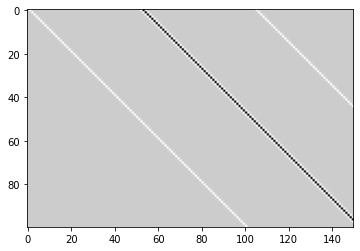

In [9]:
# Construimos las matriz W

W = np.triu(toeplitz(k_v))

plt.imshow(W[0:100,0:150], cmap='gray')
plt.show()

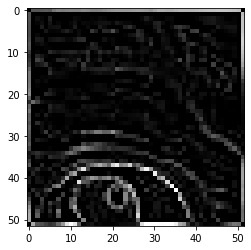

In [10]:
out_matrix = W @ im_v

out_matrix = np.reshape(out_matrix, [h + kh -1, w + kw -1])

out_matrix = np.clip(out_matrix, 0, 255)

plt.imshow(out_matrix, cmap='gray')
plt.show()

In [11]:
# Comprobamos que el resultado es el mismo por ambos caminos
np.allclose(out_matrix, out_conv)

True

In [12]:
total_parameters = W.shape[0]*W.shape[1]
print('Total parameters: {}'.format(total_parameters))

total_non_zero = (W != 0).sum()
print('Total non-zero parameters: {}'.format(total_non_zero))

print('Non zero ratio: {:.4f} %'.format(100*total_non_zero/total_parameters))

Total parameters: 7311616
Total non-zero parameters: 23859
Non zero ratio: 0.3263 %
